In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Load the Boston Housing dataset
boston_data_path = 'boston_house_prices.csv'
boston_data = pd.read_csv(boston_data_path, skiprows=1)


In [3]:
boston_data.shape

(506, 14)

In [4]:
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:

# Normalizing the dataset
min_max_scaler = MinMaxScaler()
boston_data_normalized = pd.DataFrame(min_max_scaler.fit_transform(boston_data), columns=boston_data.columns)


In [6]:
# Extract features (X) and target variable (y)
X = boston_data_normalized.drop('MEDV', axis=1)
y = boston_data_normalized['MEDV']

   Variables:
        L: Number of layers is represented by self.L.
        n: The array with the number of units in each layer is represented by self.n.
        xi: The array of arrays for activations is represented by self.xi.
        w: The array of matrices for weights is represented by self.w.
        theta: The array of arrays for thresholds is represented by self.theta.
        delta: The array of arrays for the propagation of errors is represented by self.delta.
        d_w: The array of matrices for the changes of weights is represented by self.d_w.
        d_theta: The array of arrays for the changes of thresholds is represented by self.d_theta.
        d_w_prev: The array of matrices for the previous changes of weights is represented by self.d_w_prev.
        d_theta_prev: The array of arrays for the previous changes of thresholds is represented by self.d_theta_prev.
        fact: The activation function name is stored in self.activation.

In [7]:
boston_data_normalized.describe

<bound method NDFrame.describe of          CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0    0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1    0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2    0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3    0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4    0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   
..        ...   ...       ...   ...       ...       ...       ...       ...   
501  0.000633  0.00  0.420455   0.0  0.386831  0.580954  0.681771  0.122671   
502  0.000438  0.00  0.420455   0.0  0.386831  0.490324  0.760041  0.105293   
503  0.000612  0.00  0.420455   0.0  0.386831  0.654340  0.907312  0.094381   
504  0.001161  0.00  0.420455   0.0  0.386831  0.619467  0.889804  0.114514   
505  0.000462  0.00  0.420455   0.0  0.386831  0.473079  0.802266  0.125072   

          RAD    

In [17]:

class MyNeuralNetwork:            
    def __init__(self, layers, learning_rate, momentum, activation, validation_percentage=0):
        self.L = len(layers)
        self.n = layers.copy()
        self.xi = [np.zeros(l) for l in layers]
        self.w = [np.random.randn(layers[i], layers[i-1]) for i in range(1, self.L)]
        self.theta = [np.zeros(l) for l in layers]
        self.delta = [np.zeros(l) for l in layers]
        self.d_w = [np.zeros_like(w) for w in self.w]
        self.d_theta = [np.zeros_like(t) for t in self.theta]
        self.d_w_prev = [np.zeros_like(w) for w in self.w]
        self.d_theta_prev = [np.zeros_like(t) for t in self.theta]
        self.learning_rate = learning_rate 
        self.momentum = momentum 
        self.activation = activation
        self.validation_percentage = validation_percentage
        self.loss_epochs = []

    def activation_function(self, x):
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.activation == 'relu':
            return np.maximum(0, x)
        elif self.activation == 'linear':
            return x
        elif self.activation == 'tanh':
            return np.tanh(x)
        else:
            raise ValueError("Invalid activation function")

    def activation_derivative(self, x):
        if self.activation == 'sigmoid':
            return x * (1 - x)
        elif self.activation == 'relu':
            return np.where(x > 0, 1, 0)
        elif self.activation == 'linear':
            return 1
        elif self.activation == 'tanh':
            return 1 - x**2
        else:
            raise ValueError("Invalid activation function")

    def forward_pass(self, x):
        self.xi[0] = x
        for i in range(1, self.L):
            self.xi[i] = self.activation_function(np.dot(self.w[i-1], self.xi[i-1]) - self.theta[i])

    def backward_pass(self, y):
        self.delta[-1] = (self.xi[-1] - y) * self.activation_derivative(self.xi[-1])
        for i in range(self.L - 2, 0, -1):
            self.delta[i] = np.dot(self.w[i].T, self.delta[i+1]) * self.activation_derivative(self.xi[i])

    def update_weights(self):
        for i in range(1, self.L):
            self.d_w[i-1] = self.learning_rate * np.outer(self.delta[i], self.xi[i-1]) + self.momentum * self.d_w_prev[i-1]
            self.d_theta[i] = self.learning_rate * self.delta[i] + self.momentum * self.d_theta_prev[i]
            self.w[i-1] -= self.d_w[i-1]
            self.theta[i] -= self.d_theta[i]
            self.d_w_prev[i-1] = self.d_w[i-1]
            self.d_theta_prev[i] = self.d_theta[i]
            
    def mape(self, y_true, y_pred):
        mask = y_true != 0
        return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

    def fit(self, X, y, epochs, batch_size=32, learning_rate_decay=0.1):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=self.validation_percentage, random_state=42)

        # Reset index for X_train and y_train
        X_train.reset_index(drop=True, inplace=True)
        y_train.reset_index(drop=True, inplace=True)

        loss_epochs = []

        for epoch in range(epochs):
            for _ in range(0, len(X_train), batch_size):
                batch_indices = np.random.choice(len(X_train), batch_size, replace=False)
                X_batch, y_batch = X_train.iloc[batch_indices], y_train.iloc[batch_indices]

                for i in range(len(X_batch)):
                    x_sample, y_sample = X_batch.iloc[i], y_batch.iloc[i]
                    self.forward_pass(x_sample)
                    self.backward_pass(y_sample)
                    self.update_weights()

                # Calculate training error (MSE) and MAPE
                train_predictions = self.predict(X_train)
                training_error = mean_squared_error(y_train, train_predictions)
                training_mape = self.mape(y_train, train_predictions)
                training_r2 = r2_score(y_train, train_predictions)

                # Calculate validation error (MSE) and MAPE
                val_predictions = self.predict(X_val)
                validation_error = mean_squared_error(y_val, val_predictions)
                validation_mape = self.mape(y_val, val_predictions)
                validation_r2 = r2_score(y_val, val_predictions)

                self.loss_epochs.append([training_error, validation_error, training_mape, validation_mape])

                # Print values during training
                if epoch % 10 == 0:
                    print(f"Epoch {epoch}/{epochs} - Training Error: {training_error}, Validation Error: {validation_error}, Training MAPE: {training_mape}, Validation MAPE: {validation_mape}, Training R2: {training_r2}, Validation R2: {validation_r2}")

            # Learning rate decay
            self.learning_rate *= (1.0 / (1.0 + learning_rate_decay * epoch))

        final_train_mape = self.mape(y_train, self.predict(X_train))
        final_val_mape = self.mape(y_val, self.predict(X_val))
        final_train_r2 = r2_score(y_train, self.predict(X_train))
        final_val_r2 = r2_score(y_val, self.predict(X_val))
        final_train_mse = mean_squared_error(y_train, self.predict(X_train))
        final_val_mse = mean_squared_error(y_val, self.predict(X_val))
        print(f"Final Training MAPE: {final_train_mape}, Final Validation MAPE: {final_val_mape}, Final Training R2: {final_train_r2}, Final Validation R2: {final_val_r2}, Final Training MSE: {final_train_mse}, Final Validation MSE: {final_val_mse}")
        return np.array(self.loss_epochs)
    
    
    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            self.forward_pass(X.iloc[i])
            predictions.append(self.xi[-1][0])
        return np.array(predictions)

    def get_loss_epochs(self):
        return np.array(self.loss_epochs)

In [18]:
# Define neural network parameters with two hidden layers
layers = [13, 9, 15, 1]  # Input layer: 13 features, Hidden layers: 10, 8, Output layer: 1 unit
learning_rate = 0.01
momentum = 0.9
activation = 'sigmoid'
validation_percentage = 0.2
epochs = 100

# Create and train the neural network
nn = MyNeuralNetwork(layers, learning_rate, momentum, activation, validation_percentage)
loss_history = nn.fit(X, y, epochs)


Epoch 0/100 - Training Error: 0.18061533728844004, Validation Error: 0.15316440827874808, Training MAPE: 91.97523760604585, Validation MAPE: 91.87231080486067, Training R2: -3.2101039198643253, Validation R2: -3.2294003309006296
Epoch 0/100 - Training Error: 0.177226006060057, Validation Error: 0.1500412307579133, Training MAPE: 90.55045102821828, Validation MAPE: 90.33001314197607, Training R2: -3.131099351899281, Validation R2: -3.143158571548547
Epoch 0/100 - Training Error: 0.17261899667260944, Validation Error: 0.1457993044548845, Training MAPE: 88.60870729843741, Validation MAPE: 88.19929378812009, Training R2: -3.0237109729712515, Validation R2: -3.026024279637628
Epoch 0/100 - Training Error: 0.16541159439209602, Validation Error: 0.13918064387421733, Training MAPE: 85.61043678618218, Validation MAPE: 84.78666917377365, Training R2: -2.8557080057328172, Validation R2: -2.843260114224946
Epoch 0/100 - Training Error: 0.15373256148812328, Validation Error: 0.1284918746081933, Tra

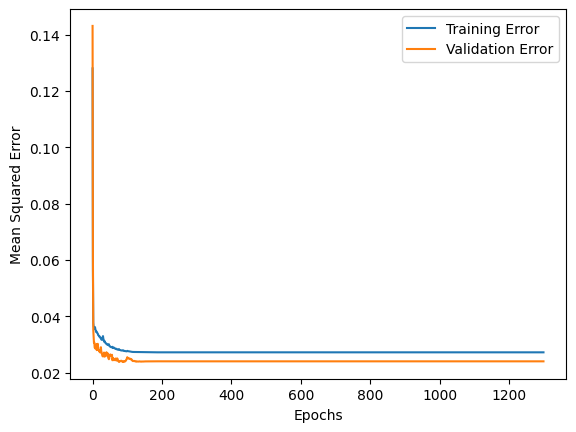

In [10]:
# Plot the evolution of the training and validation errors
import matplotlib.pyplot as plt

loss_history = nn.get_loss_epochs()

plt.plot(loss_history[:, 0], label='Training Error')
plt.plot(loss_history[:, 1], label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()



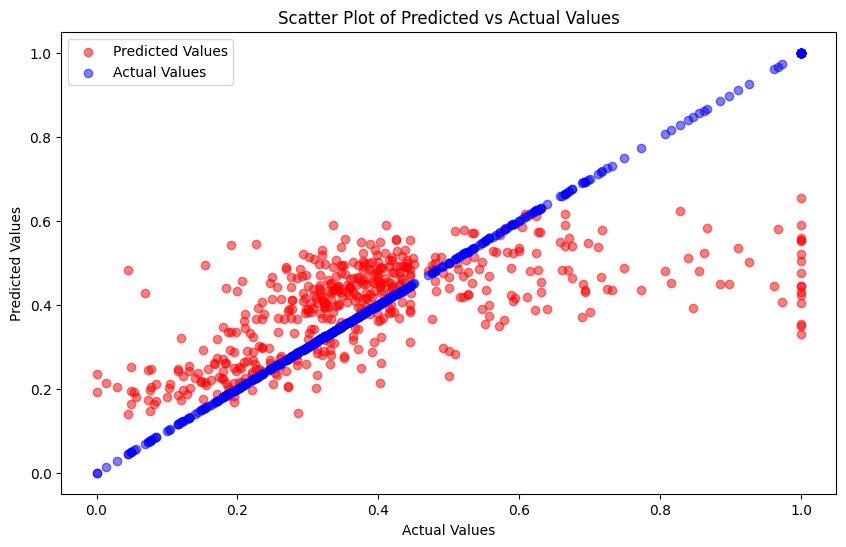

In [11]:
# Scatter plot with diagonal line and separate colors for predicted and actual values
plt.figure(figsize=(10, 6))
predictions = nn.predict(X)
plt.scatter(y, predictions, color='red', label='Predicted Values', alpha=0.5)
plt.scatter(y, y, color='blue', label='Actual Values', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.legend()
plt.show()